### 训练fashion_mnist数据集 
参考资料：https://tensorflow.google.cn/tutorials/keras/classification

In [1]:
from __future__ import absolute_import,division,print_function,unicode_literals

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0


#### Import the fashion MNIST dataset

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
print(train_images.shape)
print(train_labels.shape)
print(type(train_labels))
print(test_images.shape)

class_name = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
             "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

(60000, 28, 28)
(60000,)
<class 'numpy.ndarray'>
(10000, 28, 28)


In [4]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

#### preprocess the data

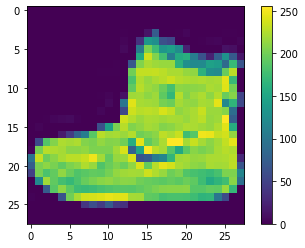

In [5]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


In [6]:
# 利用numpy的广播机制，对数组做标准化
train_images = train_images / 255.0
test_images = test_images / 255.0

<function matplotlib.pyplot.imshow(X, cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, shape=<deprecated parameter>, filternorm=1, filterrad=4.0, imlim=<deprecated parameter>, resample=None, url=None, *, data=None, **kwargs)>

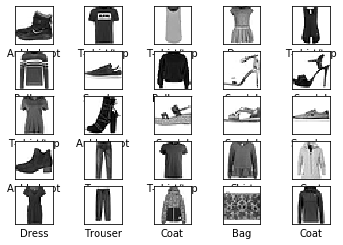

In [7]:
plt.figure()
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    plt.xlabel(class_name[train_labels[i]])
plt.imshow


#### build the model

In [8]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

In [9]:
# compile the model
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [10]:
# train the model
model.fit(train_images, train_labels, epochs = 10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 183us/sample - loss: 0.4948 - accuracy: 0.8269
Epoch 2/10
60000/60000 [==============================] - 6s 95us/sample - loss: 0.3703 - accuracy: 0.8661
Epoch 3/10
60000/60000 [==============================] - 6s 97us/sample - loss: 0.3356 - accuracy: 0.8777
Epoch 4/10
60000/60000 [==============================] - 6s 96us/sample - loss: 0.3086 - accuracy: 0.8863
Epoch 5/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.2914 - accuracy: 0.8926
Epoch 6/10
60000/60000 [==============================] - 6s 96us/sample - loss: 0.2771 - accuracy: 0.8974
Epoch 7/10
60000/60000 [==============================] - 8s 132us/sample - loss: 0.2647 - accuracy: 0.9024
Epoch 8/10
60000/60000 [==============================] - 8s 130us/sample - loss: 0.2556 - accuracy: 0.9051
Epoch 9/10
60000/60000 [==============================] - 6s 108us/sample - loss: 0.2464 - accuracy: 0.9084
Epoch 10/

#### evaluate the accuracy

In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)
print('\n Test accuracy:', test_acc)

10000/1 - 2s - loss: 0.2382 - accuracy: 0.8837

 Test accuracy: 0.8837


#### make predictions

In [13]:
predictions = model.predict(test_images)

In [14]:
print(predictions[0])

[4.5390718e-09 1.0121570e-09 2.0312934e-08 3.6287182e-10 3.2027145e-08
 1.9741556e-04 3.9496836e-08 1.5771315e-03 3.6073295e-08 9.9822527e-01]


In [15]:
np.argmax(predictions[0])

9

In [16]:
test_labels[0]

9

In [31]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap = plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_name[predicted_label],
                                        100*np.max(predictions_array),
                                        class_name[true_label]),
                color = color)
    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color = "#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')
    

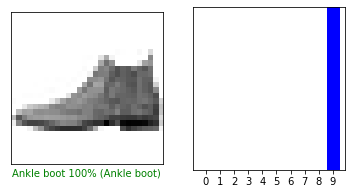

In [32]:
i = 0
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(i , predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()


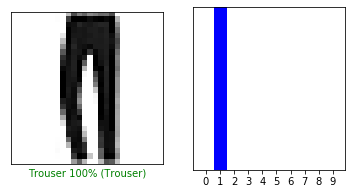

In [34]:
i = 2
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(i , predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()